# Spam Email Detection

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
print("Total missing values in the dataset:\n", df.isnull().sum())

Total missing values in the dataset:
 Category    0
Message     0
dtype: int64


In [4]:
print("Total duplicates in the dataset : ", df.duplicated().sum())

Total duplicates in the dataset :  415


In [5]:
#remove Duplicates keeping only 1 occurence
df = df.drop_duplicates(keep = 'first')
print("Total duplicates in the dataset after removal of duplicates : ", df.duplicated().sum())

Total duplicates in the dataset after removal of duplicates :  0


Text(0.5, 1.0, 'Classification of Dataset')

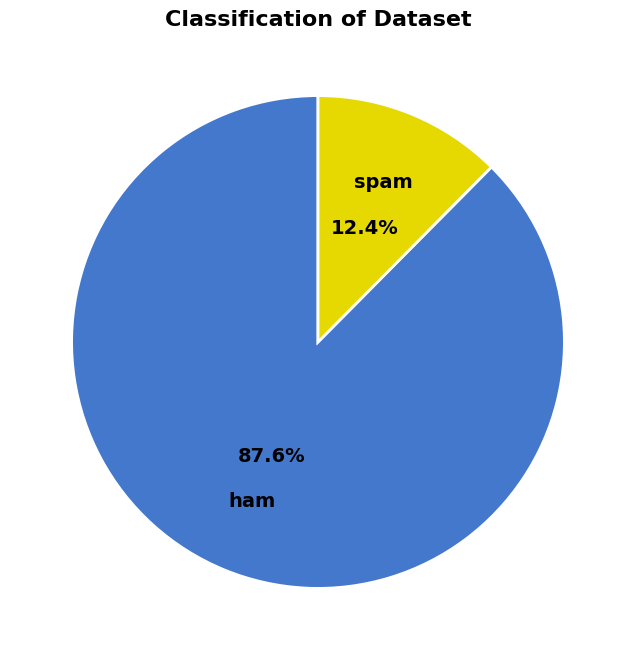

In [6]:
pie_df = df['Category'].value_counts().reset_index()


plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(pie_df['count'], 
                                    labels=['ham', 'spam'], 
                                    autopct='%1.1f%%', 
                                    textprops={'fontsize':12},
                                    startangle = 90, 
                                    labeldistance=0.7,
                                    pctdistance=0.5,
                                    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
                                    colors=['#4378cc','#e6d902'])

# Customize text labels
for text in texts:
    text.set_horizontalalignment('center')
    text.set(size=14, weight='bold')
# Customize percent labels
for autotext in autotexts:
    autotext.set_horizontalalignment('center')
    autotext.set(size=14, weight='bold')

    
plt.title("Classification of Dataset",fontsize=16, fontweight='bold')

In [7]:
##Create a new column for storing our labels which tells us if the message is Spam(1) or not(0)
#df['Spam']= df.Category.apply(lambda x : 1 if x == 'spam' else 0)

In [8]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Use LabelEncoder for labelling the dataset
encoder = LabelEncoder()
df['Category'] = encoder.fit_transform(df['Category'])

**We use Label Encoder which converts the Category column to have 0 and 1 to show if the message is spam (1) or ham (0).**

In [10]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.shape

(5157, 2)

**Create Train and Test dataset using test_train_split**

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(df.Message, df.Category, test_size = 0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4125,), (1032,), (4125,), (1032,))

**We can create a pipeline with the Count Vectorizer and Multinomial Naive Bayes Classifier.**

In [13]:
model = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('mnb', MultinomialNB())
        ])
model

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mnb', MultinomialNB())])

Classifier :  Multinomial Naive Bayes
Accuracy   :  98.55 %
Precision  :  99.18 %


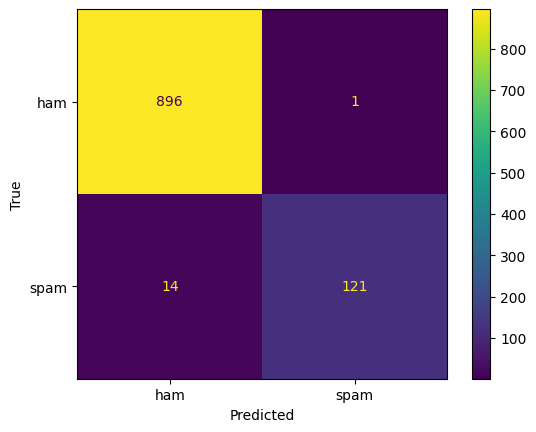

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       897
           1       0.99      0.90      0.94       135

    accuracy                           0.99      1032
   macro avg       0.99      0.95      0.97      1032
weighted avg       0.99      0.99      0.99      1032



In [14]:
print('\033[1mClassifier : ', 'Multinomial Naive Bayes')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("\033[1mAccuracy   : ", "{:.2f}".format(accuracy_score(Y_test, predictions)*100), "%")
print("\033[1mPrecision  : ", "{:.2f}".format(precision_score(Y_test, predictions)*100), "%")
cm = confusion_matrix(Y_test, predictions, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['ham', 'spam'])
disp.plot()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print("\033[1mClassification Report\033[0m")
print(classification_report(Y_test, predictions))

In [17]:
# 2. Pipeline with Logistic Regression
lr = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('lr', LogisticRegression(max_iter=1000))
])

Classifier :  Multinomial Naive Bayes
Accuracy   :  98.55 %
Precision  :  99.18 %


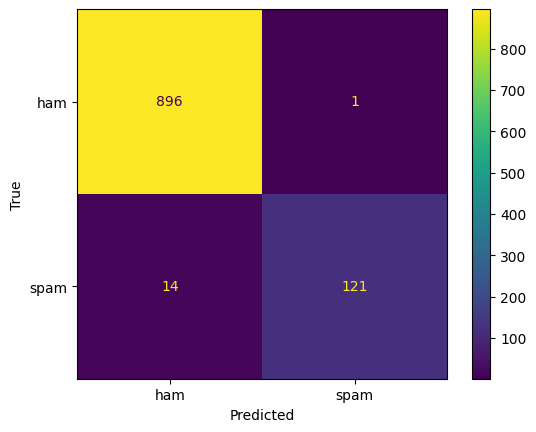

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       897
           1       0.99      0.90      0.94       135

    accuracy                           0.99      1032
   macro avg       0.99      0.95      0.97      1032
weighted avg       0.99      0.99      0.99      1032



In [18]:
print('\033[1mClassifier : ', 'Multinomial Naive Bayes')
lr.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("\033[1mAccuracy   : ", "{:.2f}".format(accuracy_score(Y_test, predictions)*100), "%")
print("\033[1mPrecision  : ", "{:.2f}".format(precision_score(Y_test, predictions)*100), "%")
cm = confusion_matrix(Y_test, predictions, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['ham', 'spam'])
disp.plot()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print("\033[1mClassification Report\033[0m")
print(classification_report(Y_test, predictions))

Accuracy   :  97.87 %
Precision  :  97.48 %


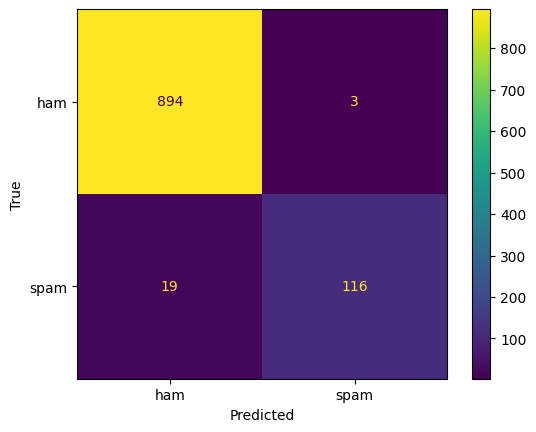

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       897
           1       0.97      0.86      0.91       135

    accuracy                           0.98      1032
   macro avg       0.98      0.93      0.95      1032
weighted avg       0.98      0.98      0.98      1032



In [24]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# SVM pipeline
svm = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svm', SVC(kernel='linear'))
])

# Train the model
svm.fit(X_train, Y_train)

# Make predictions
predictions = svm.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
print("\033[1mAccuracy   : ", "{:.2f}".format(accuracy * 100), "%")
print("\033[1mPrecision  : ", "{:.2f}".format(precision * 100), "%")

# Confusion matrix
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham', 'spam'])
disp.plot()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print("\033[1mClassification Report\033[0m")
print(classification_report(Y_test, predictions))


Accuracy   :  97.48 %
Precision  :  100.00 %


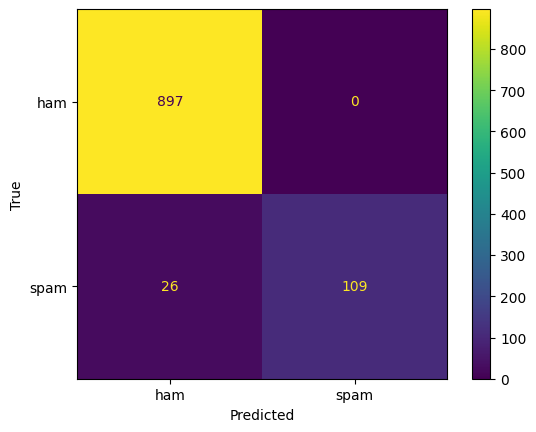

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       897
           1       1.00      0.81      0.89       135

    accuracy                           0.97      1032
   macro avg       0.99      0.90      0.94      1032
weighted avg       0.98      0.97      0.97      1032



In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Random Forest pipeline
rf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

# Train the model
rf.fit(X_train, Y_train)

# Make predictions
predictions = rf.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
print("\033[1mAccuracy   : ", "{:.2f}".format(accuracy * 100), "%")
print("\033[1mPrecision  : ", "{:.2f}".format(precision * 100), "%")

# Confusion matrix
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham', 'spam'])
disp.plot()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print("\033[1mClassification Report\033[0m")
print(classification_report(Y_test, predictions))


Accuracy   :  91.18 %
Precision  :  100.00 %


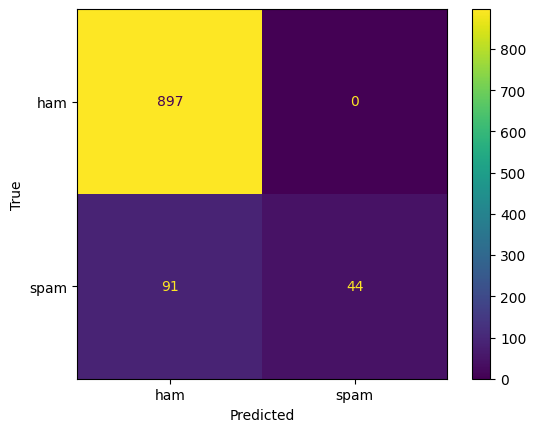

Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       897
           1       1.00      0.33      0.49       135

    accuracy                           0.91      1032
   macro avg       0.95      0.66      0.72      1032
weighted avg       0.92      0.91      0.89      1032



In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# K-Nearest Neighbors pipeline
knn = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

# Train the model
knn.fit(X_train, Y_train)

# Make predictions
predictions = knn.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
print("\033[1mAccuracy   : ", "{:.2f}".format(accuracy * 100), "%")
print("\033[1mPrecision  : ", "{:.2f}".format(precision * 100), "%")

# Confusion matrix
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham', 'spam'])
disp.plot()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print("\033[1mClassification Report\033[0m")
print(classification_report(Y_test, predictions))


Accuracy   :  96.03 %
Precision  :  87.30 %


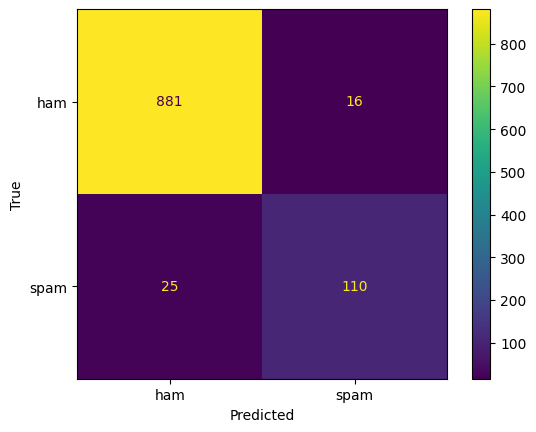

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       897
           1       0.87      0.81      0.84       135

    accuracy                           0.96      1032
   macro avg       0.92      0.90      0.91      1032
weighted avg       0.96      0.96      0.96      1032



In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Decision Tree pipeline
dt = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('dt', DecisionTreeClassifier())
])

# Train the model
dt.fit(X_train, Y_train)

# Make predictions
predictions = dt.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
print("\033[1mAccuracy   : ", "{:.2f}".format(accuracy * 100), "%")
print("\033[1mPrecision  : ", "{:.2f}".format(precision * 100), "%")

# Confusion matrix
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham', 'spam'])
disp.plot()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print("\033[1mClassification Report\033[0m")
print(classification_report(Y_test, predictions))
